In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
import import_ipynb
#import Scaling_methods as scaling

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

matplotlib.rc('axes', titlesize=14)
matplotlib.rc('xtick', labelsize=14)     
matplotlib.rc('ytick', labelsize=20)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 12,
         'axes.labelsize': 16,
         'axes.titlesize':16,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
pylab.rcParams.update(params)

In [3]:
#features used
index = ['u (m/s)', 'T (K)', 'H2', 'H', 'O', 'O2', 'OH',
       'H2O', 'HO2', 'H2O2', 'C', 'CH', 'CH2', 'CH2(S)', 'CH3', 'CH4', 'CO',
       'CO2', 'HCO', 'CH2O', 'CH2OH', 'CH3O', 'CH3OH', 'C2H', 'C2H2', 'C2H3',
       'C2H4', 'C2H5', 'C2H6', 'HCCO', 'CH2CO', 'HCCOH', 'N', 'NH', 'NH2',
       'NH3', 'NNH', 'NO', 'NO2', 'N2O', 'HNO', 'CN', 'HCN', 'H2CN', 'HCNN',
       'HCNO', 'HOCN', 'HNCO', 'NCO', 'N2', 'AR', 'C3H7', 'C3H8', 'CH2CHO',
       'CH3CHO']
# target
target_name = ['Tin']

In [4]:
Y_pf = pd.read_csv("Y_pf.csv", sep=',', names = index) #shape: (26000, 55)

In [5]:
X_pf = pd.read_csv("X.csv", sep=',', names = ['unknown_1', 'unknown_2', 'Tin']) #shape: (25999, 3) 
X_pf.head()


,unknown_1,unknown_2,Tin
0,0.011614,0.085258,500
1,0.017166,0.085258,900
2,0.018035,0.033771,500
3,0.013240,0.028302,300
4,0.014744,0.060219,900


In [6]:
# Features
#df = new_labels  #shape:
df = Y_pf         #shape:

# target
#target = labels['Tin']  #shape:
target = X_pf['Tin']     #shape:

In [7]:
df_with_target = pd.concat([Y_pf, target],axis=1)

In [8]:
Y_pf_sampled = df_with_target.loc[df_with_target['Tin'] == 300]
Y_pf_sampled.head()
X_sampled = Y_pf_sampled.drop(['Tin'], axis =1)

In [9]:
"""sns.pairplot(X_sampled[['HO2', 'H2O2', 'C', 'CH', 'CH2', 'CH2(S)', 
       'H2O', 'C3H8', 'CH2CHO', 'CH3', 'CH4', 'CO',
       'CO2', 'HCO', 'CH2O', 'CH2OH', 'CH3O', 'CH3OH',
       'CH3CHO']], size=3);"""

"sns.pairplot(X_sampled[['HO2', 'H2O2', 'C', 'CH', 'CH2', 'CH2(S)', \n       'H2O', 'C3H8', 'CH2CHO', 'CH3', 'CH4', 'CO',\n       'CO2', 'HCO', 'CH2O', 'CH2OH', 'CH3O', 'CH3OH',\n       'CH3CHO']], size=3);"

Text(0,0.5,'H2O')

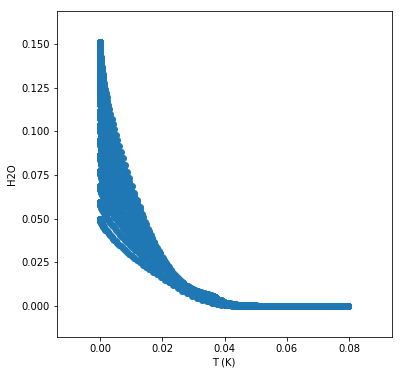

In [10]:
plt.figure(figsize=(6,6));
y = X_sampled['CH4']
x = X_sampled['CO2']
plt.scatter(x, y);
plt.xlabel('T (K)')
plt.ylabel("H2O")

Text(0,0.5,'H2O')

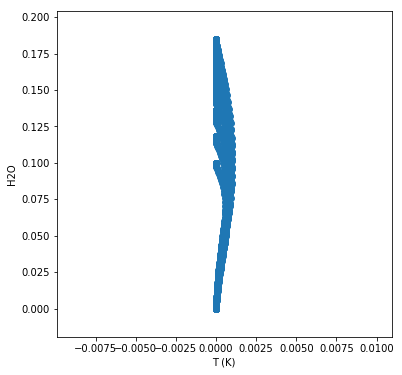

In [11]:



plt.figure(figsize=(6,6));
y = X_sampled['H2O']
x = X_sampled['CH2O']
plt.scatter(x, y);
plt.xlabel('T (K)')
plt.ylabel("H2O")

In [12]:
class RangeScaler():
    def __init__(self):
        return None

    def transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        Z = X/(np.max(X, axis=0)-np.min(X, axis=0))
        return Z
    
    def fit_transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        X_mean = X.mean(axis=0)
        X_center = X-X_mean
        Z = X_center/(np.max(X, axis=0)-np.min(X, axis=0))
        return Z

In [13]:
f1 = 'H2O'
f2 = 'CH2O'
X = pd.concat([X_sampled[f1],X_sampled[f2]], axis =1)
range_scaler = RangeScaler()
X_range_scaled = range_scaler.fit_transform(X)

In [14]:
X_range_scaled.shape

(6500, 2)

Text(0.5,0,'T (K)')

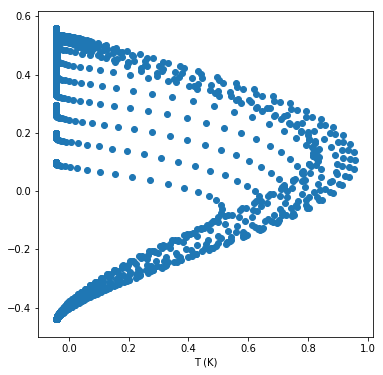

In [15]:
plt.figure(figsize=(6,6));
y = X_range_scaled[:,0]
x = X_range_scaled[:,1]
plt.scatter(x, y);
plt.xlabel('T (K)')

In [19]:
# Create an instance for KMeans

X_range_scaled = pd.DataFrame(X_range_scaled, columns=[f1, f2])
kmeans = KMeans(n_clusters=3,  random_state=0)
kmeans.fit(X_range_scaled)
df_labels = pd.DataFrame(kmeans.labels_, columns=['kmeans_idx'])
kmeans_labels = pd.concat([X_range_scaled, df_labels], axis=1)
kmeans_labels.shape
df_labels.kmeans_idx.value_counts()
kmeans_labels.head()
kmeans_labels.shape

(6500, 3)

In [20]:
kmeans_clusters_idx = ['cluster_'+str(k+1) for k in range(10)]
for k in range(10):
    kmeans_clusters_idx[k] = kmeans_labels.loc[kmeans_labels['kmeans_idx'] == k] 
kmeans_clusters_idx[1].head()

,H2O,CH2O,kmeans_idx
1,0.459799,-0.041601,1
5,0.485404,-0.041601,1
8,0.509767,-0.041480,1
10,0.552226,-0.041601,1
12,0.098687,-0.041601,1


In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 8))

surf1 = ax1.scatter(kmeans_labels[f1], kmeans_labels[f2],c=kmeans_labels['kmeans_idx'])
ax1.set_xlabel('First principal component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('StandardScaler scaling: centring and scaling')
fig.colorbar(surf1,label='kmeans_idx')